## Loading the data

In [1]:
from keras.datasets import mnist
data = mnist.load_data()

## Data split and Data pre-processing

In [2]:
# unpacking the tuple data into test and train set
(X_train, y_train), (X_test, y_test) = data

In [3]:
# reshaping the data
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [4]:
# finding max and min value for normalization
X_train.max()
X_test.max()
print((min(X_train[1]), max(X_train[1])))

(0.0, 255.0)


In [5]:
# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

In [6]:
# Encoding the classes for prediction
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encoded  = encoder.fit_transform(y_test.reshape(-1, 1)).toarray()

## Building a simple dense network with SGD optimizer

In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(300, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(200, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [8]:
from keras import optimizers
from keras import callbacks

learning_rate = 0.1
training_epochs = 100
batch_size = 100
# Created exponential decay learning rate
lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=1000,
    decay_rate=0.9)
# Initializing SGD optimizer
optimizer = optimizers.SGD(learning_rate=lr_schedule)
# Created early stopping callback
callback = callbacks.EarlyStopping(monitor='loss', patience=3)

In [9]:
# using categorical_crossentropy as loss function
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [10]:
# training the model
history1 = model.fit(X_train, y_train_encoded,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_split=0.2,
                     callbacks=[callback],
                     use_multiprocessing=True)

Epoch 1/100
480/480 - 1s - loss: 0.7836 - accuracy: 0.7984 - val_loss: 0.3582 - val_accuracy: 0.9013
Epoch 2/100
480/480 - 1s - loss: 0.3360 - accuracy: 0.9044 - val_loss: 0.2841 - val_accuracy: 0.9184
Epoch 3/100
480/480 - 1s - loss: 0.2784 - accuracy: 0.9188 - val_loss: 0.2450 - val_accuracy: 0.9292
Epoch 4/100
480/480 - 1s - loss: 0.2429 - accuracy: 0.9300 - val_loss: 0.2171 - val_accuracy: 0.9380
Epoch 5/100
480/480 - 1s - loss: 0.2149 - accuracy: 0.9376 - val_loss: 0.1968 - val_accuracy: 0.9455
Epoch 6/100
480/480 - 1s - loss: 0.1934 - accuracy: 0.9442 - val_loss: 0.1819 - val_accuracy: 0.9498
Epoch 7/100
480/480 - 1s - loss: 0.1759 - accuracy: 0.9491 - val_loss: 0.1680 - val_accuracy: 0.9531
Epoch 8/100
480/480 - 1s - loss: 0.1620 - accuracy: 0.9528 - val_loss: 0.1576 - val_accuracy: 0.9554
Epoch 9/100
480/480 - 1s - loss: 0.1494 - accuracy: 0.9569 - val_loss: 0.1493 - val_accuracy: 0.9588
Epoch 10/100
480/480 - 1s - loss: 0.1394 - accuracy: 0.9594 - val_loss: 0.1425 - val_accura

### Model accuracy and loss

In [11]:
# evaluating model on test data
scores = model.evaluate(X_test,y_test_encoded)
print("Accuracy: ",scores[1])
print("Loss: ",scores[0])

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9750
Accuracy:  0.9750000238418579
Loss:  0.07948898524045944


In [12]:
# learning rate for model
lr = [lr_schedule(x).numpy() for x in range(len(history1.history['loss']))]
print("Initial learning rate: ", lr[0])
print("Final learning rate: ", lr[-1])

Initial learning rate:  0.1
Final learning rate:  0.09896236


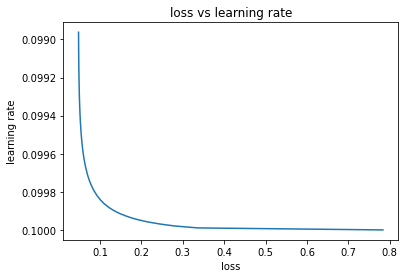

In [13]:
# Plotting loss vs learning rate
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],lr)
plt.title('loss vs learning rate')
plt.ylabel('learning rate')
plt.xlabel('loss')
plt.gca().invert_yaxis()
plt.show()

### With Adam optimizer

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
480/480 - 1s - loss: 2.7381 - accuracy: 0.1028 - val_loss: 2.7186 - val_accuracy: 0.1035
Epoch 2/100
480/480 - 1s - loss: 2.5206 - accuracy: 0.1002 - val_loss: 2.5770 - val_accuracy: 0.1060
Epoch 3/100
480/480 - 1s - loss: 2.5268 - accuracy: 0.1003 - val_loss: 2.4224 - val_accuracy: 0.0956
Epoch 4/100
480/480 - 1s - loss: 2.5708 - accuracy: 0.1018 - val_loss: 2.42

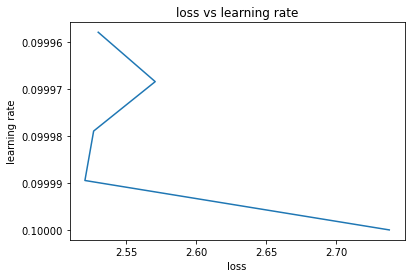

In [14]:
# Creating model with adam optimizer
model_adam = Sequential()
model_adam.add(Dense(300, input_dim = 28 * 28, activation= 'relu'))
model_adam.add(Dense(200, activation = 'sigmoid'))
model_adam.add(Dense(10, activation = 'softmax'))
model_adam.summary()

# initializing adam optimizer
optimizer_adam = optimizers.Adam(learning_rate=lr_schedule)

model_adam.compile(loss='categorical_crossentropy',
              optimizer=optimizer_adam,
              metrics=['accuracy'])

# training the model
history_adam = model_adam.fit(X_train, y_train_encoded,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_split=0.2,
                     callbacks=[callback],
                     use_multiprocessing=True)

# evaluating scores on test dataset
scores_adam = model_adam.evaluate(X_test,y_test_encoded)

print("Score with adam optimizer")
print("Accuracy: ",scores_adam[1])
print("Loss: ",scores_adam[0])

# Calculating learning rate
lr_adam = [lr_schedule(x).numpy() for x in range(len(history_adam.history['loss']))]
print("Initial learning rate: ", lr_adam[0])
print("Final learning rate: ", lr_adam[-1])

# plotting loss vs learning rate 
import matplotlib.pyplot as plt
plt.plot(history_adam.history['loss'],lr_adam)
plt.title('loss vs learning rate')
plt.ylabel('learning rate')
plt.xlabel('loss')
plt.gca().invert_yaxis()
plt.show()

### With RMSprop optimizer

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
480/480 - 1s - loss: 7.4428 - accuracy: 0.0995 - val_loss: 8.6806 - val_accuracy: 0.1081
Epoch 2/100
480/480 - 1s - loss: 6.7428 - accuracy: 0.1006 - val_loss: 8.9930 - val_accuracy: 0.0975
Epoch 3/100
480/480 - 1s - loss: 6.3075 - accuracy: 0.1015 - val_loss: 6.2146 - val_accuracy: 0.0989
Epoch 4/100
480/480 - 1s - loss: 5.9732 - accuracy: 0.1022 - val_loss: 5.86

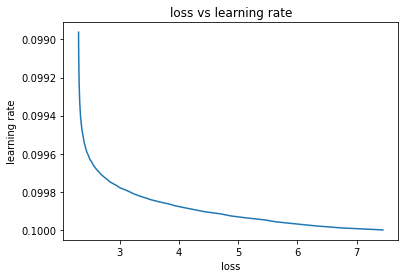

In [15]:
# training model with RMSprop
model_rms = Sequential()
model_rms.add(Dense(300, input_dim = 28 * 28, activation= 'relu'))
model_rms.add(Dense(200, activation = 'sigmoid'))
model_rms.add(Dense(10, activation = 'softmax'))
model_rms.summary()

# Initializing rms optimizer
optimizer_rms = optimizers.RMSprop(learning_rate=lr_schedule)

model_rms.compile(loss='categorical_crossentropy',
              optimizer=optimizer_rms,
              metrics=['accuracy'])

# training the model
history_rms = model_rms.fit(X_train, y_train_encoded,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_split=0.2,
                     callbacks=[callback],
                     use_multiprocessing=True)

# evaluating the scores
scores_rms = model_rms.evaluate(X_test,y_test_encoded)

print("Score with RMSprop optimizer")
print("Accuracy: ",scores_rms[1])
print("Loss: ",scores_rms[0])

# Calculating learning date 
lr_rms = [lr_schedule(x).numpy() for x in range(len(history_rms.history['loss']))]


print("Initial learning rate: ", lr_rms[0])
print("Final learning rate: ", lr_rms[-1])

# Plotting loss vs learning rate
import matplotlib.pyplot as plt
plt.plot(history_rms.history['loss'],lr_rms)
plt.title('loss vs learning rate')
plt.ylabel('learning rate')
plt.xlabel('loss')
plt.gca().invert_yaxis()
plt.show()